In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from statsmodels.miscmodels.ordinal_model import OrderedModel

## **PreProcess Data**
---

### Import Data

In [6]:
df = pd.read_csv("year_prediction.csv")
df['decade'] = (df['label'] // 10) * 10
display(df)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,decade
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,2000
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,2000
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,2000
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,2000
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052,2000
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815,2000
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364,2000
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909,2000


### Split Data

In [7]:
df_sample = df.sample(n=5000, random_state=1)

avg_cols = [f'TimbreAvg{i}' for i in range(1, 13)]
cov_cols = [f'TimbreCovariance{i}' for i in range(1, 79)]

feature_cols = avg_cols + cov_cols
X = df_sample[feature_cols]
y = df_sample['decade']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=feature_cols, index=y_train.index)
X_test_df = pd.DataFrame(X_test, columns=feature_cols, index=y_test.index)

# Extract and separate average and covariance features
X_avg_train, X_avg_test = X_train[:, :12], X_test[:, :12]
X_avg_train_df = pd.DataFrame(X_avg_train, columns=avg_cols, index=y_train.index)
X_avg_test_df = pd.DataFrame(X_avg_test, columns=avg_cols, index=y_test.index)

X_cov_train, X_cov_test= X_train[:, 12:], X_test[:, 12:]
X_cov_train_df = pd.DataFrame(X_cov_train, columns=cov_cols, index=y_train.index)
X_cov_test_df = pd.DataFrame(X_cov_test, columns=cov_cols, index=y_test.index)

print("Shape of X_train & X_test:", X_train.shape, X_test.shape)
print("Shape of X_avg_train & X_avg_test:", X_avg_train.shape, X_avg_test.shape)
print("Shape of X_cov_train & X_cov_test:", X_cov_train.shape, X_cov_test.shape)

Shape of X_train & X_test: (4000, 90) (1000, 90)
Shape of X_avg_train & X_avg_test: (4000, 12) (1000, 12)
Shape of X_cov_train & X_cov_test: (4000, 78) (1000, 78)


## **Multinomial Logistic Regression**
---

### RFE on All Features:

TimbreAvg2: 0
TimbreAvg6: 1
TimbreCovariance11: 2
TimbreAvg1: 3
TimbreCovariance55: 4
TimbreCovariance18: 5
TimbreCovariance67: 6
TimbreCovariance15: 7
TimbreAvg3: 8
TimbreCovariance1: 9
TimbreCovariance2: 10
TimbreCovariance66: 11
TimbreCovariance29: 12
TimbreCovariance46: 13
TimbreCovariance48: 14
TimbreAvg4: 15
TimbreAvg8: 16
TimbreCovariance49: 17
TimbreCovariance33: 18
TimbreCovariance59: 19
TimbreCovariance31: 20
TimbreCovariance54: 21
TimbreCovariance39: 22
TimbreCovariance6: 23
TimbreCovariance44: 24
TimbreCovariance28: 25
TimbreAvg11: 26
TimbreCovariance77: 27
TimbreCovariance50: 28
TimbreCovariance7: 29
TimbreCovariance12: 30
TimbreCovariance53: 31
TimbreCovariance71: 32
TimbreCovariance36: 33
TimbreCovariance23: 34
TimbreCovariance64: 35
TimbreCovariance75: 36
TimbreAvg12: 37
TimbreAvg5: 38
TimbreCovariance9: 39
TimbreCovariance76: 40
TimbreCovariance27: 41
TimbreCovariance52: 42
TimbreCovariance32: 43
TimbreCovariance8: 44
TimbreCovariance20: 45
TimbreCovariance16: 46
Timbr

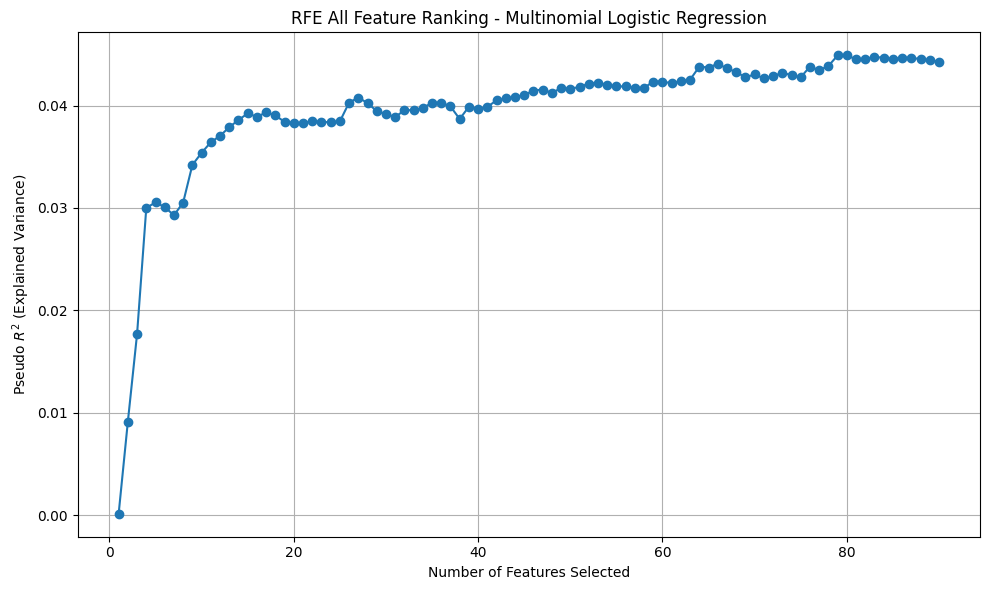

In [8]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_train_df[selected], y_train)

    probs = clf.predict_proba(X_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE All Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

### RFE on TimbreAvg Features:

TimbreAvg2: 0
TimbreAvg6: 1
TimbreAvg1: 2
TimbreAvg3: 3
TimbreAvg4: 4
TimbreAvg10: 5
TimbreAvg11: 6
TimbreAvg12: 7
TimbreAvg7: 8
TimbreAvg8: 9
TimbreAvg9: 10
TimbreAvg5: 11


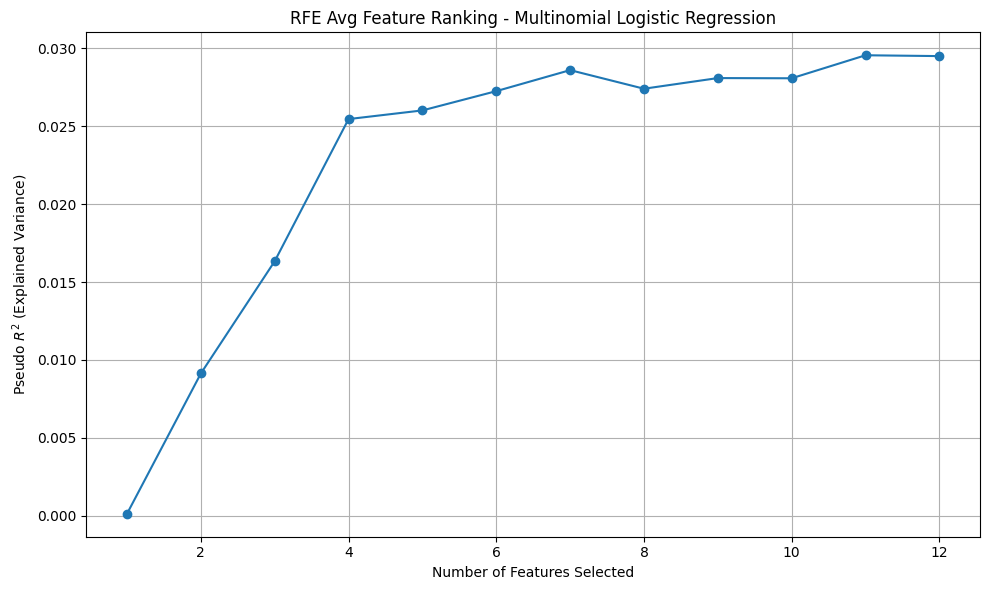

In [9]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_avg_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_avg_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_avg_train_df[selected], y_train)

    probs = clf.predict_proba(X_avg_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE Avg Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

### RFE on TimbreCovariance Features:

TimbreCovariance55: 0
TimbreCovariance1: 1
TimbreCovariance71: 2
TimbreCovariance51: 3
TimbreCovariance56: 4
TimbreCovariance66: 5
TimbreCovariance76: 6
TimbreCovariance18: 7
TimbreCovariance67: 8
TimbreCovariance11: 9
TimbreCovariance15: 10
TimbreCovariance3: 11
TimbreCovariance48: 12
TimbreCovariance46: 13
TimbreCovariance7: 14
TimbreCovariance29: 15
TimbreCovariance57: 16
TimbreCovariance39: 17
TimbreCovariance6: 18
TimbreCovariance28: 19
TimbreCovariance2: 20
TimbreCovariance63: 21
TimbreCovariance33: 22
TimbreCovariance9: 23
TimbreCovariance49: 24
TimbreCovariance31: 25
TimbreCovariance44: 26
TimbreCovariance53: 27
TimbreCovariance8: 28
TimbreCovariance10: 29
TimbreCovariance41: 30
TimbreCovariance54: 31
TimbreCovariance47: 32
TimbreCovariance32: 33
TimbreCovariance52: 34
TimbreCovariance59: 35
TimbreCovariance77: 36
TimbreCovariance5: 37
TimbreCovariance17: 38
TimbreCovariance36: 39
TimbreCovariance37: 40
TimbreCovariance12: 41
TimbreCovariance40: 42
TimbreCovariance75: 43
Timbre

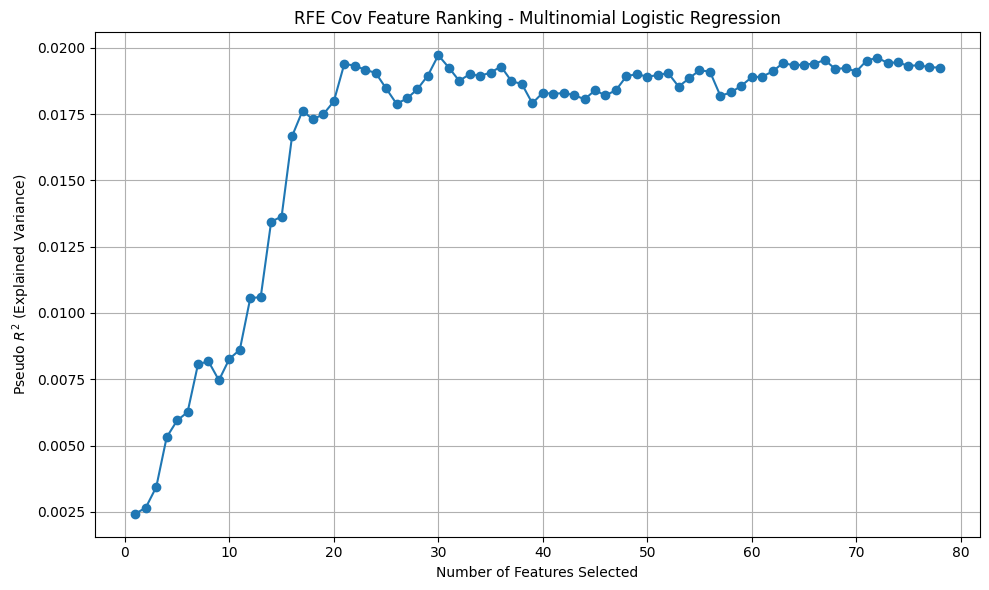

In [10]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_cov_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_cov_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_cov_train_df[selected], y_train)

    probs = clf.predict_proba(X_cov_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE Cov Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Ordinal Logistic Regression**
---


Removed: TimbreAvg5, Score w/o it: 0.0274
Removed: TimbreAvg7, Score w/o it: 0.0273
Removed: TimbreAvg12, Score w/o it: 0.0271
Removed: TimbreAvg8, Score w/o it: 0.0269
Removed: TimbreAvg10, Score w/o it: 0.0262
Removed: TimbreAvg9, Score w/o it: 0.0256
Removed: TimbreAvg11, Score w/o it: 0.0239
Removed: TimbreAvg4, Score w/o it: 0.0228
Removed: TimbreAvg6, Score w/o it: 0.0204
Removed: TimbreAvg2, Score w/o it: 0.0134
Removed: TimbreAvg3, Score w/o it: 0.0063
Feature Ranking:
TimbreAvg1: 0
TimbreAvg3: 1
TimbreAvg2: 2
TimbreAvg6: 3
TimbreAvg4: 4
TimbreAvg11: 5
TimbreAvg9: 6
TimbreAvg10: 7
TimbreAvg8: 8
TimbreAvg12: 9
TimbreAvg7: 10
TimbreAvg5: 11


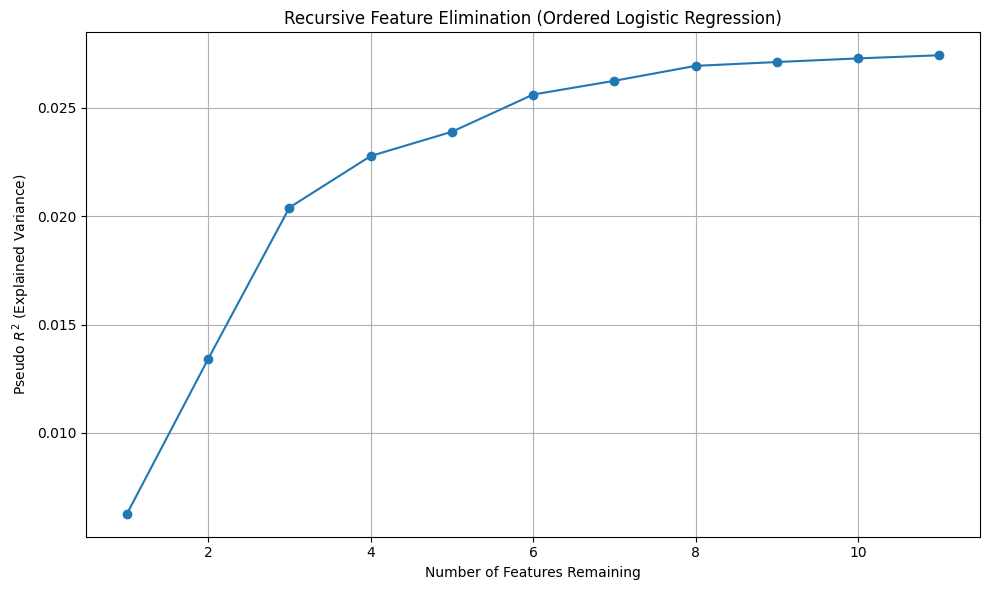

In [11]:
remaining_features = list(X_avg_train_df.columns)
feature_ranking = []
r2_scores = []

# Work with full feature set initially
while len(remaining_features) > 1:
    scores = []

    for feature in remaining_features:
        # Try leaving out one feature
        test_features = [f for f in remaining_features if f != feature]
        
        model = OrderedModel(y_train, X_avg_train_df[test_features], distr='logit')
        res = model.fit(method='bfgs', disp=False)

        probs = res.predict(X_avg_test_df[test_features])
        expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)
        score = explained_variance_score(y_test, expected_value)

        scores.append((score, feature))

    # Identify the worst-performing feature (i.e. whose removal improved performance the least)
    worst_score, worst_feature = max(scores, key=lambda x: x[0])
    
    # Remove that feature
    remaining_features.remove(worst_feature)
    
    # Record the eliminated feature (least useful at this stage)
    feature_ranking.insert(0, worst_feature)  # insert at front so we get best-to-worst at the end
    r2_scores.append(worst_score)

    print(f"Removed: {worst_feature}, Score w/o it: {worst_score:.4f}")

# Add the last remaining feature
feature_ranking.insert(0, remaining_features[0])
print("Feature Ranking:")
for i, feature in enumerate(feature_ranking):
    print(f"{feature}: {i}")
    
# Optional: plot R² over number of remaining features
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(r2_scores), 0, -1)), r2_scores, marker='o')
plt.xlabel('Number of Features Remaining')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('Recursive Feature Elimination (Ordered Logistic Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


## **LASSO Regression**
---

In [34]:

# ___________Find Best Alpha___________
param_grid = {'alpha': np.linspace(0.01, 1, 25)} 
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Fit the model with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Evaluate the performance on the test set
test_score = lasso_best.score(X_test, y_test)

print(f"Best alpha from GridSearchCV: {best_alpha}")
print(f"Best cross-validation score: {best_score}")
print(f"Test R^2 score: {test_score}")


# ___________Apply Best Alpha___________

lasso = Lasso(alpha=best_alpha, random_state=1)
lasso.fit(X_train, y_train)

coef = pd.Series(lasso.coef_, index=feature_cols)
selected_features = coef[coef != 0]

# Sort by the absolute value but retain the original sign
sorted_by_abs_value = selected_features.reindex(selected_features.abs().sort_values(ascending=False).index)

num_features = len(sorted_by_abs_value)
print(f"\n{num_features} Selected Features by LASSO (sorted by absolute value):")
print(sorted_by_abs_value)


Best alpha from GridSearchCV: 0.0925
Best cross-validation score: 0.18246578242567682
Test R^2 score: 0.23313359712034087

64 Selected Features by LASSO (sorted by absolute value):
TimbreAvg1            3.928756
TimbreAvg2           -2.563781
TimbreAvg6           -2.551916
TimbreCovariance11    1.958952
TimbreAvg3           -1.601104
                        ...   
TimbreCovariance30    0.007500
TimbreCovariance60    0.002015
TimbreCovariance23    0.000863
TimbreCovariance70   -0.000555
TimbreCovariance14   -0.000444
Length: 64, dtype: float64


## **Correlation Matrix**
---

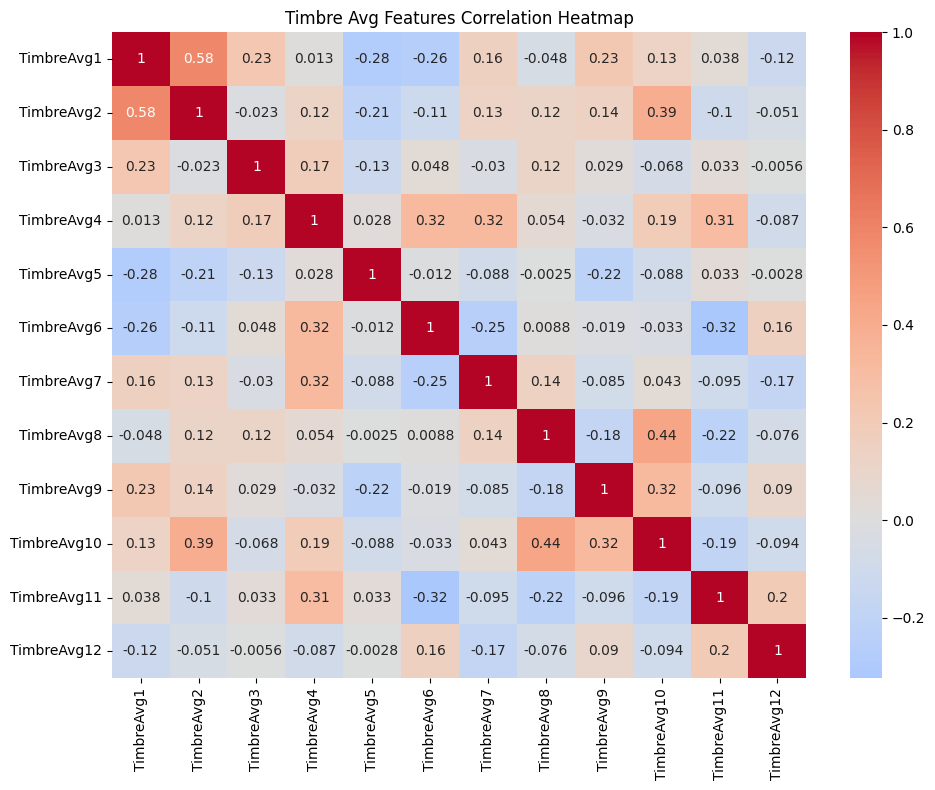


Highly Correlated Feature Pairs (|correlation| > 0.5):
TimbreAvg1 - TimbreAvg2: 0.58


In [44]:
# Assuming X_avg_train_df is your feature DataFrame
correlation_matrix = X_avg_train_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Timbre Avg Features Correlation Heatmap')
plt.tight_layout()
plt.show()

# Print high correlation pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

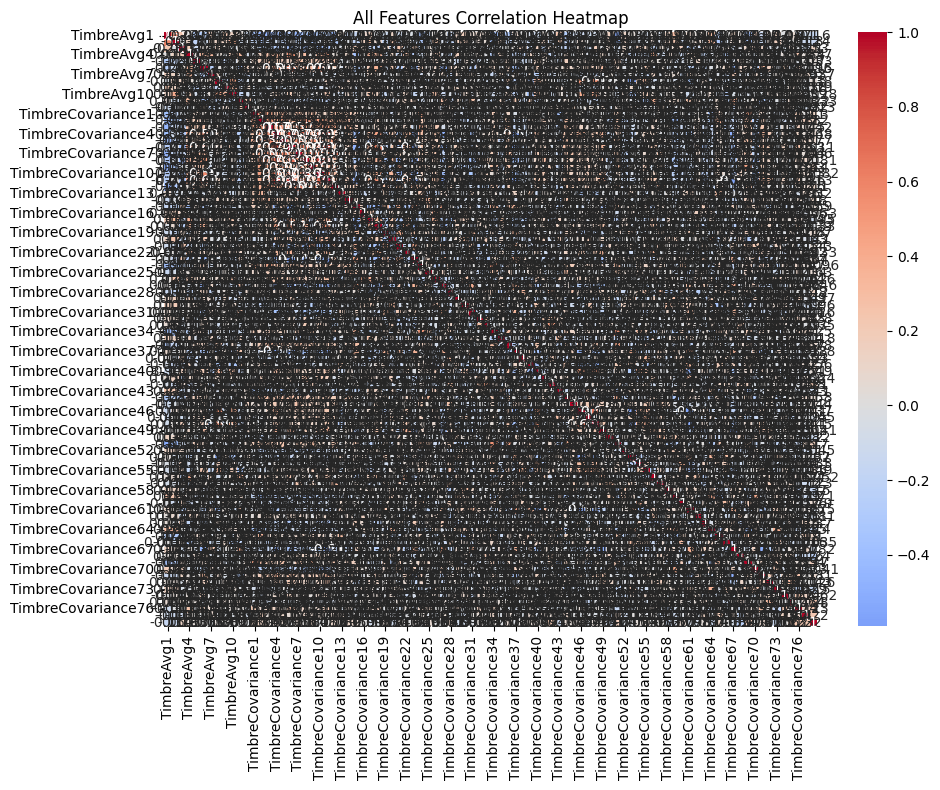


Highly Correlated Feature Pairs (|correlation| > 0.5):
TimbreCovariance6 - TimbreCovariance11: 0.88
TimbreCovariance8 - TimbreCovariance10: 0.86
TimbreCovariance4 - TimbreCovariance11: 0.86
TimbreCovariance4 - TimbreCovariance6: 0.79
TimbreCovariance10 - TimbreCovariance11: 0.73
TimbreCovariance6 - TimbreCovariance10: 0.72
TimbreCovariance4 - TimbreCovariance8: 0.71
TimbreCovariance8 - TimbreCovariance11: 0.71
TimbreCovariance4 - TimbreCovariance10: 0.69
TimbreCovariance6 - TimbreCovariance8: 0.68
TimbreAvg6 - TimbreCovariance6: 0.66
TimbreCovariance46 - TimbreCovariance48: 0.65
TimbreCovariance7 - TimbreCovariance12: 0.64
TimbreAvg6 - TimbreCovariance11: 0.64
TimbreCovariance7 - TimbreCovariance9: 0.62
TimbreCovariance9 - TimbreCovariance12: 0.61
TimbreCovariance11 - TimbreCovariance23: -0.59
TimbreAvg1 - TimbreAvg2: 0.58
TimbreAvg6 - TimbreCovariance4: 0.58
TimbreCovariance6 - TimbreCovariance18: 0.57
TimbreCovariance3 - TimbreCovariance7: 0.57
TimbreCovariance5 - TimbreCovariance7:

In [45]:
correlation_matrix = X_train_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('All Features Correlation Heatmap')
plt.tight_layout()
plt.show()

# Collect high correlation pairs
correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# Sort by absolute correlation value in descending order
sorted_correlation_pairs = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)

# Print sorted correlation pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.5):")
for feature1, feature2, corr_value in sorted_correlation_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")